In [1]:
import h5py
import numpy as np
import json

In [2]:
with open('../utils.json', 'r') as f:    
    json_data = json.load(f)
    file_path = json_data['data']['path']
with h5py.File(file_path, 'r') as h5f:
    traces = h5f['traces'][()]
    plaintexts = h5f['plaintext'][()]
    ciphertexts = h5f['ciphertext'][()]
    keys = h5f['keys'][()]

In [14]:
import random
import copy

def randomDelay(traces, window):
    new_traces = np.zeros(shape=(traces.shape))
    for index, trace in enumerate(traces):
        random_num = random.randint(0, window)
        if random_num != 0:
            new_traces[index][random_num : ] = trace[ : -random_num]
        else:
            new_traces[index] = trace
    return new_traces

In [15]:
delay_traces = randomDelay(traces, 50)

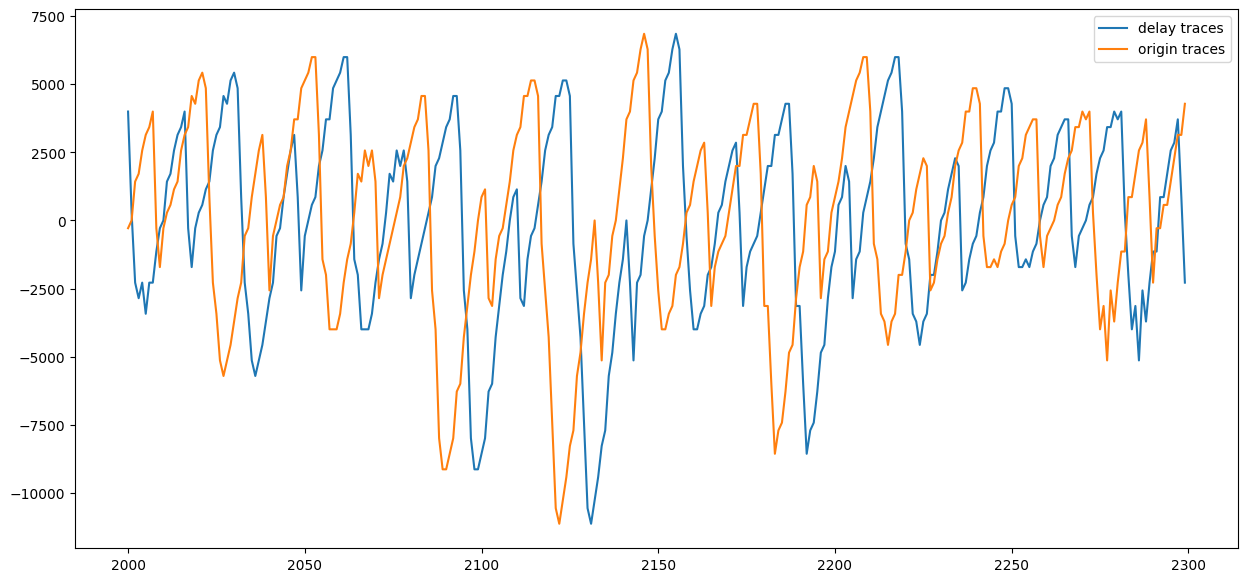

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
x = range(2000, 2300)
plt.plot(x, delay_traces[1][2000:2300], label='delay traces')
plt.plot(x, traces[1][2000:2300], label='origin traces')
plt.legend()
plt.savefig('random_delay.png')
plt.show()